<a href="https://colab.research.google.com/github/bsse1027/Stock-Market-Predictor/blob/main/GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
df =  pd.read_csv('new_GP.csv')

In [10]:
df.dtypes

Unnamed: 0                    int64
date                         object
trading_code                 object
last_traded_price           float64
high                        float64
low                         float64
opening_price               float64
closing_price               float64
yesterdays_closing_price    float64
trade                         int64
value_mn                    float64
volume                        int64
dtype: object

In [11]:
#df.date = pd.to_datetime(df.date,infer_datetime_format=True)

In [12]:
df

,Unnamed: 0,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,30332,12/30/2009,GP,187.0,190.0,186.4,189.5,187.5,188.6,4072,271.3656,1442400
1,30333,12/29/2009,GP,188.7,194.9,188.2,190.0,188.6,189.7,4693,270.5450,1420400
2,30334,12/27/2009,GP,190.0,190.0,183.5,183.9,189.7,182.5,5903,350.7145,1863600
3,30335,12/24/2009,GP,183.6,183.8,179.4,181.0,182.5,180.2,5526,287.1175,1584200
4,30336,12/23/2009,GP,179.9,181.4,177.0,178.3,180.2,176.7,6029,318.6734,1776600
...,...,...,...,...,...,...,...,...,...,...,...,...
2873,36292,1/7/2021,GP,366.2,376.0,366.0,376.0,366.2,371.2,1147,106.3660,288816
2874,36293,1/6/2021,GP,373.9,379.6,366.0,376.0,371.2,376.4,1381,169.3160,456966
2875,36294,1/5/2021,GP,376.4,388.0,367.5,370.6,376.4,370.6,1842,166.2770,438324
2876,36295,1/4/2021,GP,370.6,376.0,360.1,360.1,370.6,358.4,1842,171.3360,463513


In [13]:
df = df.drop('trading_code',axis=1)
df

,Unnamed: 0,date,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,30332,12/30/2009,187.0,190.0,186.4,189.5,187.5,188.6,4072,271.3656,1442400
1,30333,12/29/2009,188.7,194.9,188.2,190.0,188.6,189.7,4693,270.5450,1420400
2,30334,12/27/2009,190.0,190.0,183.5,183.9,189.7,182.5,5903,350.7145,1863600
3,30335,12/24/2009,183.6,183.8,179.4,181.0,182.5,180.2,5526,287.1175,1584200
4,30336,12/23/2009,179.9,181.4,177.0,178.3,180.2,176.7,6029,318.6734,1776600
...,...,...,...,...,...,...,...,...,...,...,...
2873,36292,1/7/2021,366.2,376.0,366.0,376.0,366.2,371.2,1147,106.3660,288816
2874,36293,1/6/2021,373.9,379.6,366.0,376.0,371.2,376.4,1381,169.3160,456966
2875,36294,1/5/2021,376.4,388.0,367.5,370.6,376.4,370.6,1842,166.2770,438324
2876,36295,1/4/2021,370.6,376.0,360.1,360.1,370.6,358.4,1842,171.3360,463513


In [14]:
df.dtypes

Unnamed: 0                    int64
date                         object
last_traded_price           float64
high                        float64
low                         float64
opening_price               float64
closing_price               float64
yesterdays_closing_price    float64
trade                         int64
value_mn                    float64
volume                        int64
dtype: object

In [15]:
from sklearn import metrics
final_prediction=[]
actual_value=[]
root_mse=0
df1 = df.copy()
X = df.drop(['last_traded_price','date'],axis=1)
y = df.last_traded_price
kf = KFold(n_splits=5)
for Fold,(id_tr,id_te) in enumerate(kf.split(X,y)):
    X_train = X.iloc[id_tr]
    X_test = X.iloc[id_te]
    y_train = y.iloc[id_tr]
    y_test = y.iloc[id_te]
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    final_prediction.append(y_pred)
    actual_value.append(np.array(y_test))
    root_mse+= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    #mse_value.append(root_mse)

print("Average RMSE Value: ", root_mse/5)
    

Average RMSE Value:  2.754420347201798


In [16]:
result =[]
for i in range(len(final_prediction)):
  for f in range(len(final_prediction[i])):
    if actual_value[i][f]<=0:
      continue
    result1=(abs(final_prediction[i][f] - actual_value[i][f])/(actual_value[i][f]))*100
    result.append(100 - result1)
print("The Average Prediction Accuracy is: ",np.mean(result))

The Average Prediction Accuracy is:  99.38285989162468


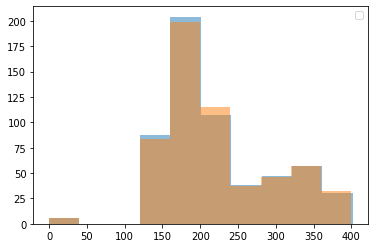

In [17]:
#hist1=pd.DataFrame(y_pred).hist()
#hist2=pd.DataFrame(y_test).hist()
plt.hist(final_prediction[1],alpha=0.5)
plt.hist(actual_value[1],alpha=0.5)
plt.legend()
plt.show()